In [1]:
# Feature Engineering (TF-IDF) + ML (RF) 

In [2]:
# packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
import sys
import os
sys.path.insert(0, os.path.abspath('../../'))

# ML models (SVM, random forest, naïve bayes, logistic regression)
from Models.ML.RandomForest import RandomForestPipeline


In [4]:
# dataset
file_path = '../../datasets/amazon_user_reviews_text_sentiment.parquet'
df = pd.read_parquet(file_path)
df.info()

# feature and target
features = "text_cleaned"
target = "sentiment"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18400 entries, 0 to 18399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sentiment     18400 non-null  int64 
 1   text_cleaned  18400 non-null  object
dtypes: int64(1), object(1)
memory usage: 287.6+ KB


In [5]:
# Feature Engineering (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
corpus = df[features]
X = vectorizer.fit_transform(corpus)

ML: Random Forest
Model training completed!
Predictions completed!
MODEL EVALUATION METRICS
Accuracy:  0.6193
Precision: 0.6194
Recall:    0.6193
F1-Score:  0.6192

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1243
           1       0.53      0.52      0.53      1209
           2       0.62      0.65      0.64      1228

    accuracy                           0.62      3680
   macro avg       0.62      0.62      0.62      3680
weighted avg       0.62      0.62      0.62      3680

ROC=AUC REPORT
AUC score: 0.7917092594953655


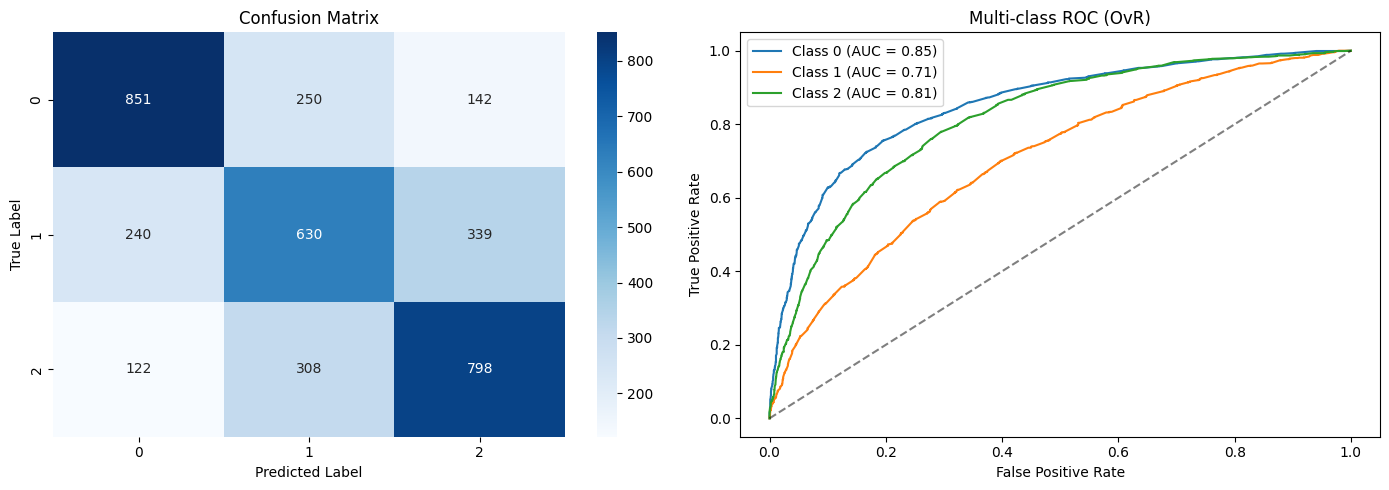

In [6]:
# Model Training

# ML: Random Forest Test
print("ML: Random Forest")
y = df[target]
rf_pipeline = RandomForestPipeline(features=features, test_size=0.2, random_state=42, n_estimators=100)
rf_pipeline.run_pipeline(X, y)